In [2]:
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM
from torch.nn import functional as F
import random

model_name = 'flax-community/papuGaPT2'
device = 'cuda'
device = 'cpu'

tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(model_name).to(device)

/home/prych/.local/lib/python3.10/site-packages/torch/_utils.py:776: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


In [3]:
model.transformer

GPT2Model(
  (wte): Embedding(50257, 768)
  (wpe): Embedding(1024, 768)
  (drop): Dropout(p=0.0, inplace=False)
  (h): ModuleList(
    (0-11): 12 x GPT2Block(
      (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (attn): GPT2Attention(
        (c_attn): Conv1D()
        (c_proj): Conv1D()
        (attn_dropout): Dropout(p=0.0, inplace=False)
        (resid_dropout): Dropout(p=0.0, inplace=False)
      )
      (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (mlp): GPT2MLP(
        (c_fc): Conv1D()
        (c_proj): Conv1D()
        (act): NewGELUActivation()
        (dropout): Dropout(p=0.0, inplace=False)
      )
    )
  )
  (ln_f): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
)

In [4]:
def tokenize(word):
    ids = tokenizer(word, return_tensors='pt')['input_ids'][0]
    return [tokenizer.decode(n) for n in ids]

def cos(a, b):
    return a.dot(b) / (a.dot(a) * b.dot(b)) ** 0.5

emb = model.transformer.wte.weight.detach().cpu().numpy()
N = 50257

words = 'matematyka programowanie sierotka pies kapibara trznadel kot kobieta lubię jabłko banan mężczyzna facet baba babcia dziadek'.split()
words = 'lotniskowiec niszczyciel szarlotka kapliczka synagoga koszykówka długopis topologia ginekolog geriatra pierniczki bławatki prezydent presydent'.split()
words = 'tramwaj autobus komórka'.split()

for w in words:
    #tokens = tokenize(' ' + w)
    tokens = tokenize(' ' + w)
    print (tokens)
    token_id = tokenizer.encode(tokens[0])[0]
    
    score = [(cos(emb[i], emb[token_id]), tokenizer.decode(i)) for i in range(N)]
    score.sort(reverse=True)
    for s, w in score[:15]:
        print ('   ', s, f'[{w}]')
    print()
    


[' tramwaj']
    1.000000008006178 [ tramwaj]
    0.8061304981203956 [ tramwa]
    0.8010114845520071 [ tramwaju]
    0.7167424512826176 [ autobus]
    0.6705698221508032 [ autobusy]
    0.6637942545692094 [ autobu]
    0.6587696701107498 [ autobusem]
    0.658746292534865 [ autobusów]
    0.6521036898624094 [ MPK]
    0.6469379961958084 [ autobusu]
    0.6434066761079417 [ pociągi]
    0.6318465077584255 [ taksów]
    0.6305248979478794 [ autobusowy]
    0.6255215736435352 [ pociągów]
    0.6226177871743633 [ wagonów]

[' autobus']
    1.0000000013046426 [ autobus]
    0.8404779537511967 [ autobusy]
    0.8221699924934757 [ autobusu]
    0.8086090143165041 [ autobusów]
    0.7904325026939101 [ autobusem]
    0.76564243329477 [ autobu]
    0.7481052929685899 [ autobusie]
    0.7211276445309808 [ samolot]
    0.7167424512826176 [ tramwaj]
    0.7166965383574684 [ autokar]
    0.6917769454357064 [ pojazd]
    0.6882585162572558 [ bus]
    0.68645205905681 [ autobusowy]
    0.677312123001

In [5]:
emb_pos = model.transformer.wpe.weight.detach().cpu().numpy()


In [6]:
emb_pos.shape

(1024, 768)

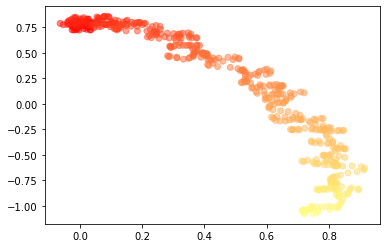

In [12]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline 

pca = PCA(n_components=2)
X_pca = pca.fit_transform(emb_pos)
M = 500
S = 10
X_pca = X_pca[S:S+M,:]

cs = [(1.0, int(k)/M, 0.5*int(k)/M) for k in range(X_pca.shape[0])]

# Plot the two most important components
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5, c=cs)
None